<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
/home/lyle/Dropbox/PhD/Code/Cascade_model_code_final/PythonFinal/General_Solutions.py:111: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(integrand_DD, D0, D1, limit = 200, points = [D0, D1, Ds])[0]


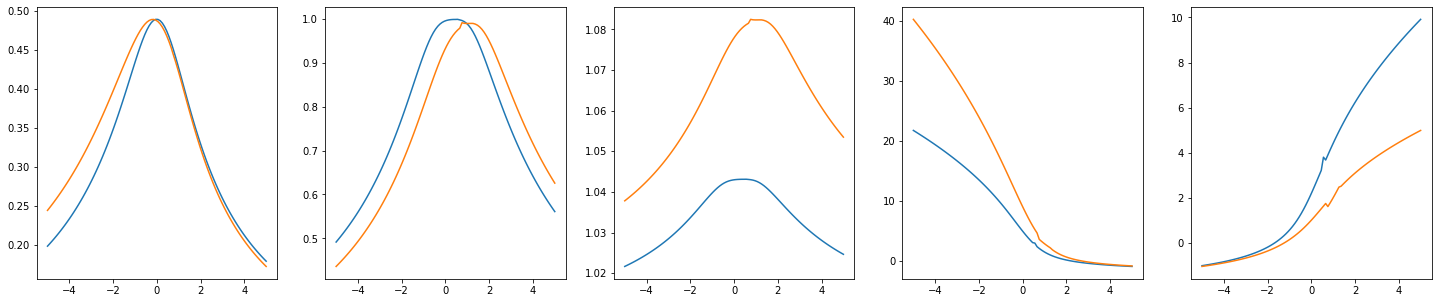

In [2]:
'''
    Finding M(mu, nu, sigma, rho, gamma), phi(mu, nu, sigma, rho, gamma) in the stable regime
'''

'''
    Here we demonstrate how to generate the data for the curves in Fig. 1 of the main text.
    The basic idea is to take the system defined by gs.system_general and iteratively solve it for some 
    path through the four dimensional parameter space defined by (nu, sigma, rho, gamma)
'''

import numpy as np
import matplotlib.pyplot as plt
import General_Solutions as gs

fig, axs = plt.subplots(1, 5, figsize = (25, 5))

# set the model parameters, make_path sets all parameters to be np.linspace(param_min, param_max, steps).
steps = 100

mu1 = -1.0
nu1 = np.linspace(5, -5, steps)
sigma1 = np.linspace(0.3, 0.3, steps)
rho1 = np.linspace(1.5, 1.5, steps)
gamma1 = np.linspace(-0.5, -0.5, steps)

# seed for this specific set of starting parameters needs to be found
# this is for the initial parameters nu = 5, sigma = 0.3, rho = 1.5, gamma = -0.5
# to get the seed for a new set of parameters, run gs.solve_along_path() 
# from the above to the parameters you want the solution at.
seed = [1.02463743, -0.95055047,  9.91702114]

# get u D0, D1 from our parameters
u1, D01, D11 = gs.solve_along_path(nu1, sigma1, rho1, gamma1, seed = seed, printProgress = False)

# plot the results
axs[0].plot(nu1, gs.avgM(mu1, nu1, rho1, D01, D11))
axs[1].plot(nu1, gs.avgPhi(sigma1, gamma1, u1))
axs[2].plot(nu1, u1)
axs[3].plot(nu1, D01)
axs[4].plot(nu1, D11)

# do the same for a different value of rho
steps = 100

mu2 = -1.0
nu2 = np.linspace(-5, 5, steps)
sigma2 = np.linspace(0.3, 0.3, steps)
rho2 = np.linspace(3.0, 3.0, steps)
gamma2 = np.linspace(-1.0, -1.0, steps)


# we need to get our system to this new value of rho, 
# so we solve along a path which gets us there and use that data as
# the seed
steps = 100

mu_seed = -1.0
nu_seed = np.linspace(nu1[-1], nu2[0], steps)
sigma_seed = np.linspace(sigma1[-1], sigma2[0], steps)
rho_seed = np.linspace(rho1[-1], rho2[0], steps)
gamma_seed = np.linspace(gamma1[-1], gamma2[0], steps)

# find new seed value, the seed is the last set of values for the last call of gs.solve_along_path
seed = gs.solve_along_path(nu_seed, sigma_seed, rho_seed, gamma_seed, seed = [u1[-1], D01[-1], D11[-1]], useAsSeed=True, printProgress = False)

u2, D02, D12 = gs.solve_along_path(nu2, sigma2, rho2, gamma2, printProgress=False, seed = seed)

# plot the results
axs[0].plot(nu2, gs.avgM(mu2, nu2, rho2, D02, D12))
axs[1].plot(nu2, gs.avgPhi(sigma2, gamma2, u2))
axs[2].plot(nu2, u2)
axs[3].plot(nu2, D02)
axs[4].plot(nu2, D12)

# this takes around ten minutes to run, youll also get some integration warnings, 
# they can be dealt with by makeing "steps" bigger in the "make_paths" functions
# The plots in the main paper typically use a value of around steps = 1000
# but this can take a lot longer


[ 1.00366178 -0.97580898 44.29082225]   [4.440892098500626e-16, 8.239936510889834e-18, 0.0]   inf   0
[ 1.00418218 -0.78037525 39.54842663]   [3.5849101465146305e-12, -9.289444213855802e-16, -2.4868995751603507e-13]   inf   1
[ 1.00487216 -0.48965602 34.17192749]   [9.558198676984375e-11, -3.5475095083725705e-14, -9.698908343125368e-12]   inf   2
[1.00576615e+00 1.76516625e-02 2.78294973e+01]   [4.506550688176958e-11, -2.565569284795899e-14, -1.1546319456101628e-11]   inf   3
[ 1.00658991  1.19756762 19.85162364]   [-2.458588888032409e-12, 3.230055112268815e-15, 3.552713678800501e-13]   inf   4


/home/lyle/Dropbox/PhD/Code/Cascade_model_code_final/PythonFinal/General_Solutions.py:107: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return a_(nu, sigma, rho, u, Ds)*func(Ds)*np.log(np.abs((D1 - Ds)/(D0 - Ds))) + integrate.quad(integrand_DD, D0, D1, limit = 200, points = [D0, D1, Ds])[0]


[1.00670504 4.40712832 9.91603873]   [1.5643042416968456e-13, 5.20798681957757e-14, 4.973799150320701e-14]   0.0   5


/home/lyle/Dropbox/PhD/Code/Cascade_model_code_final/PythonFinal/General_Solutions.py:233: RuntimeWarning: divide by zero encountered in double_scalars
  U_prefactor = u/2*((D1*rho + D0/rho) - (D1*rho - D0/rho)*mu/nu)
/home/lyle/Dropbox/PhD/Code/Cascade_model_code_final/PythonFinal/General_Solutions.py:237: RuntimeWarning: invalid value encountered in double_scalars
  return U(y)*np.exp(-1/2*(x*U(y) - y)**2)
/home/lyle/Dropbox/PhD/Code/Cascade_model_code_final/PythonFinal/General_Solutions.py:114: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(integrand_DD, D0, D1)[0]


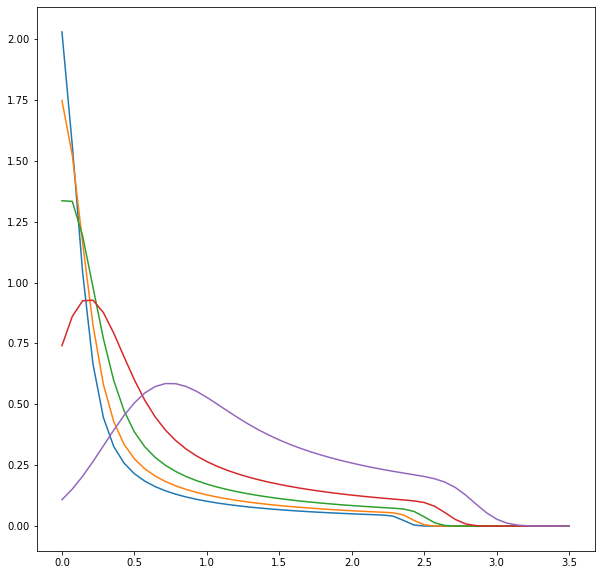

In [17]:
'''
    Abundance distributions (SADs and RADs)
'''

import numpy as np
import matplotlib.pyplot as plt
import General_Solutions as gs

fig, axs = plt.subplots(1, 1, figsize = (10, 10))

# set the model parameters, all but mu have to be vectors with equal length
steps = 5

mu1 = 0.5
nu1 = np.linspace(5, 1, steps)
sigma1 = np.linspace(0.15, 0.15, steps)
rho1 = np.linspace(1/1.5, 1/1.5, steps)
gamma1 = np.linspace(-0.3, -0.3, steps)


# seed for this specific set of starting parameters needs to be found
# this is for the initial parameters nu = 5, sigma = 0.3, rho = 1.5, gamma = -0.5
# to get the seed for a new set of parameters, run gs.solve_along_path() 
# from the above to the parameters you want the solution at.
seed = [1.00366178, -0.97580898,  44.29082225]

# get u D0, D1 from our parameters
u, D0, D1 = gs.solve_along_path(nu1, sigma1, rho1, gamma1, seed = seed, printProgress = False)

x = np.linspace(0, 3.5, 50)
for i in range(5):
    P = np.vectorize(gs.abundance_distribution)(x, mu1, nu1[i], sigma1[i], rho1[i], u[i], D0[i], D1[i])
    axs.plot(x, P)

# This takes around ten minutes to run


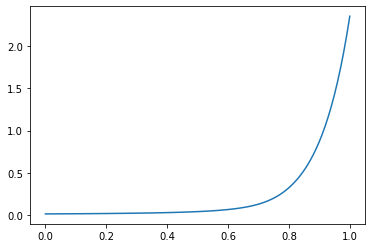

In [26]:
'''
    Abundance distributions (HADs)
'''
import numpy as np
import matplotlib.pyplot as plt
import General_Solutions as gs

mu = 0.5
nu = 5.0
sigma = 0.15
rho = 1/1.5
gamma = -0.3

u, D0, D1 = [1.00366178, -0.97580898,  44.29082225]

alpha = np.linspace(0, 1, 100)

Delta = np.vectorize(gs.Delta)(lambda x : 1, alpha, nu, sigma, rho, u, D0, D1)

plt.plot(alpha, np.vectorize(gs.M_hierarchy)(mu, nu, sigma, rho, u, D0, D1, Delta))

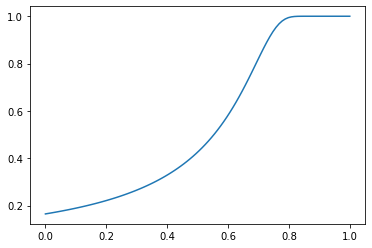

In [3]:
'''
    Survival distributions
'''
import numpy as np
import matplotlib.pyplot as plt
import General_Solutions as gs

mu = 0.5
nu = 5.0
sigma = 0.15
rho = 1/1.5
gamma = -0.3

u, D0, D1 = [1.00366178, -0.97580898,  44.29082225]

Delta = np.vectorize(gs.Delta)(n = lambda x : 1, alpha = np.linspace(0, 1, 100), 
                                    nu = nu, sigma = sigma, rho = rho, 
                                    u = u, D0 = D0, D1 = D1)

plt.plot(np.linspace(0, 1, 100), gs.phi_hierarchy(Delta))

In [ ]:
'''
    Linear instability boundary
'''
import numpy as np
import matplotlib.pyplot as plt
import General_Solutions as gs

fig, axs = plt.subplots(1, 1, figsize = (5, 5))

# An example like that in Fig. 2 Panel (b), but with gamma = -0.8, not gamma = 0.8
# this is about 1000 for the figure in the main text
pathlen = 199

# first work in from the right
nu1 = np.linspace(10, 0.25, pathlen)
rho_seed = 10.365025352587471
sigma = np.linspace(0.7, 0.7, pathlen)
gamma = np.linspace(-0.8, -0.8, pathlen)

D0_seed = -1.8559241277401952
D1_seed = 0.5315215149330804

rho, D0, D1 = gs.solve_along_lin_instability(nu = nu1, sigma = sigma, rho = rho_seed, gamma = gamma, 
                                    seed = "rho", D0_seed = D0_seed, D1_seed = D1_seed, steps = pathlen, 
                                    printProgress = True)


axs.plot(nu1, rho)
# all equations are unchnaged under the symmetry nu -> -nu, rho -> 1/rho, D0 <-> D1
axs.plot(-nu1, 1/rho)
axs.set_yscale("log")

# then from the left, with more steps you can get the two curves to come as close as you like,
# it just takes a long time to run
nu2 = np.linspace(-10, -0.25, pathlen)
rho_seed = 9.0
D0_seed = 5.25
D1_seed = -1.0

rho, D0, D1 = gs.solve_along_lin_instability(nu = nu2, sigma = sigma, rho = rho_seed, gamma = gamma, 
                                    seed = "rho", D0_seed = D0_seed, D1_seed = D1_seed, steps = pathlen, 
                                    printProgress = True)


axs.plot(nu2, rho)
axs.plot(-nu2, 1/rho)
axs.set_yscale("log")


In [ ]:
'''
    M to infinity boundary, generates the boundary found in panel (b) of Fig. 2 in the main text
'''
import General_Solutions as gs
import numpy as np
import matplotlib.pyplot as plt


# sigma, u, d0, d1 for
pathlen = 200
mu = np.linspace(-0.5, -0.5, pathlen)
nu = np.linspace(-5.0, -1.0, pathlen)
gamma = np.linspace(0.8, 0.8, pathlen)

sigma = np.linspace(0.8, 0.8, pathlen)
rho_seed = 0.32105276

rho_seed = 1/0.32105276458178955 
u_seed = 0.8549558495775879 
D0_seed = 9.104609578189056
D1_seed = -1.1470024112346386 

nu = np.linspace(-5.0, -1.0, pathlen)


rho, u, D0, D1 = gs.solve_along_Minfty_path(mu=mu, nu=nu, sigma=sigma, rho=rho_seed, gamma=gamma,
                               seed="rho", u=u_seed, D0=D0_seed, D1=D1_seed, printProgress=True, steps=pathlen)


plt.plot(nu, rho)
plt.plot(-nu, 1/rho)

# the curve gets steeper here so we take smaller steps
pathlen = 500
mu = np.linspace(-0.5, -0.5, pathlen)
gamma = np.linspace(0.8, 0.8, pathlen)
sigma = np.linspace(0.8, 0.8, pathlen)
nu = np.linspace(-1.0, 0.1, pathlen)

rho, u, D0, D1 = gs.solve_along_Minfty_path(mu = mu, nu=nu, sigma=sigma, rho=rho[-1], gamma=gamma,
                                seed="rho", u=u[-1], D0=D0[-1], D1=D1[-1], steps=pathlen)


plt.plot(nu, rho)
plt.plot(-nu, 1/rho)

plt.plot(nu, rho)
plt.yscale("log")
plt.ylim(1/11, 11)
